In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def alarm_generate(x, var_list):
    '''alarm_generate is a function when return a vector '''
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
  
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

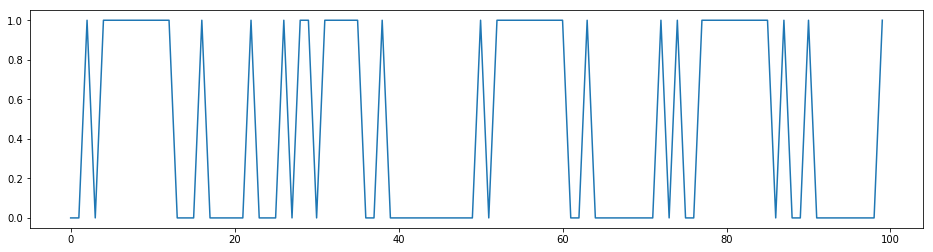

In [43]:
var_list = {
    "limit": 1,
    "type_var":'high', 
    "delay_time" : 10*3/10000, 
    "dead_band_delay" : 10*3/10000
}

t = np.linspace(0, 50, 100)
ruido = np.random.uniform(-1,1,100)
x = np.sin((t)*.5)+1+ruido 

log = alarm_generate(x,var_list)
plt.figure(figsize=(16,4))
plt.plot(log)
#plt.plot(x)

In [44]:
T1 = []
T0 = []
count_t1 = 0
count_t0 = 0
for i in log:
    if i == 1:
        count_t1+=1
        if count_t0 != 0:
            T0.append(count_t0)
            count_t0 = 0
    else:
        count_t0+=1
        if count_t1 != 0:
            T1.append(count_t1)
            count_t1 = 0

if count_t0 != 0:
    T0.append(count_t0)
if count_t1 != 0:
    T1.append(count_t1)

In [48]:
print('Tempos de ativações de alarmes T1')
print(T1)
print('Tempos entre as ativações de alarmes T0')
print(T0)

# Med_T1 = sum(T1)/len(T1)
# Med_T0 = sum(T0)/len(T0)
#print(Med_T1, Med_T0)

Tempos de ativações de alarmes T1
[1, 9, 1, 1, 1, 2, 5, 1, 1, 9, 1, 1, 1, 9, 1, 1, 1]
Tempos entre as ativações de alarmes T0
[2, 1, 3, 5, 3, 1, 1, 2, 11, 1, 2, 8, 1, 2, 1, 2, 8]
